<a href="https://colab.research.google.com/github/nathgc/Machine-Learning-Estudos/blob/main/Exemplos_MLP/MLP_MNIST_Keras_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**JUPYTER NOTEBOOK FOR A MLP LEARNING MNIST NUMBERS from 0 to 9 **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist


In [2]:
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=b2c5f25fa06e146fec71ade9d8c9eed6772dc7c52df7c0fc0b66ab5da53c43d4
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [2]:
import keras.utils

## Modelo Inicial


**Define the network hyperparameters**

In [9]:
# Trainign batch size
batch_size = 128
# Number of training epochs
epochs = 50
# Fraction of the training data to be used as validation
val_split = 0.3
# Number of classes ( multi-classification )
nb_classes = 10
# Learning rate
lr=0.1


**Load the MNIST dataset and format it for train and validation**

In [13]:
# Load MNIST dataset (28x28 pixel images)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = keras.utils.to_categorical(y_train, nb_classes)
Y_Test = keras.utils.to_categorical(y_test, nb_classes)


Link explicando erro com np_utils

https://stackoverflow.com/questions/45149341/importerror-cannot-import-name-np-utils

**Define the MLP achitecture using KERAS sequential API**

In [14]:
# Multilayer Perceptron model
model = Sequential()
model.add(Dense(input_dim=784, activation="relu", units=100, kernel_initializer="normal"))
model.add(Dense(activation="relu", units=50, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="relu", units=25, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="sigmoid", units=10, kernel_initializer="normal"))
model.compile(optimizer=SGD(lr=lr), loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 10)                260       
                                                                 
Total params: 85085 (332.36 KB)
Trainable params: 85085 (332.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Train the MLP**

In [15]:
# Train
history = model.fit(X_train, Y_Train, validation_split=val_split, epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/50
329/329 [==============================] - 2s 5ms/step - loss: 0.2428 - accuracy: 0.1341 - val_loss: 0.2361 - val_accuracy: 0.1373
Epoch 2/50
329/329 [==============================] - 2s 6ms/step - loss: 0.2295 - accuracy: 0.1399 - val_loss: 0.2230 - val_accuracy: 0.1449
Epoch 3/50
329/329 [==============================] - 2s 5ms/step - loss: 0.2165 - accuracy: 0.1499 - val_loss: 0.2099 - val_accuracy: 0.1532
Epoch 4/50
329/329 [==============================] - 1s 4ms/step - loss: 0.2028 - accuracy: 0.1533 - val_loss: 0.1952 - val_accuracy: 0.1541
Epoch 5/50
329/329 [==============================] - 1s 4ms/step - loss: 0.1858 - accuracy: 0.1307 - val_loss: 0.1750 - val_accuracy: 0.1107
Epoch 6/50
329/329 [==============================] - 1s 4ms/step - loss: 0.1595 - accuracy: 0.1010 - val_loss: 0.1413 - val_accuracy: 0.1006
Epoch 7/50
329/329 [==============================] - 1s 4ms/step - loss: 0.1219 - accuracy: 0.0987 - val_loss: 0.1063 - val_accuracy: 0.1006
Epoch 

**Evaluate the MLP performance**

In [16]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0910 - accuracy: 0.1135
Summary: Loss over the test dataset: 0.09, Accuracy: 0.11


**Plot the training and validation performances**

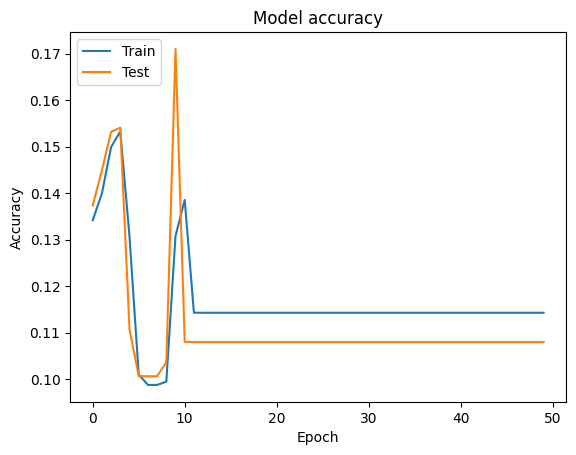

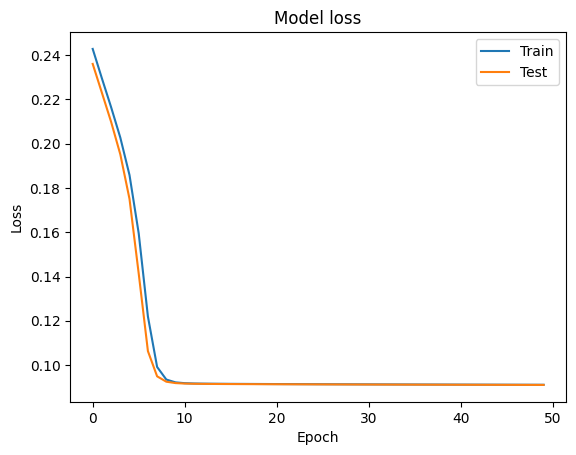

In [19]:
# Training History Visualization

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

No código acima foi preciso substituir "acc" por "accuracy"

157/157 [==============================] - 0s 2ms/step
(10000, 10)


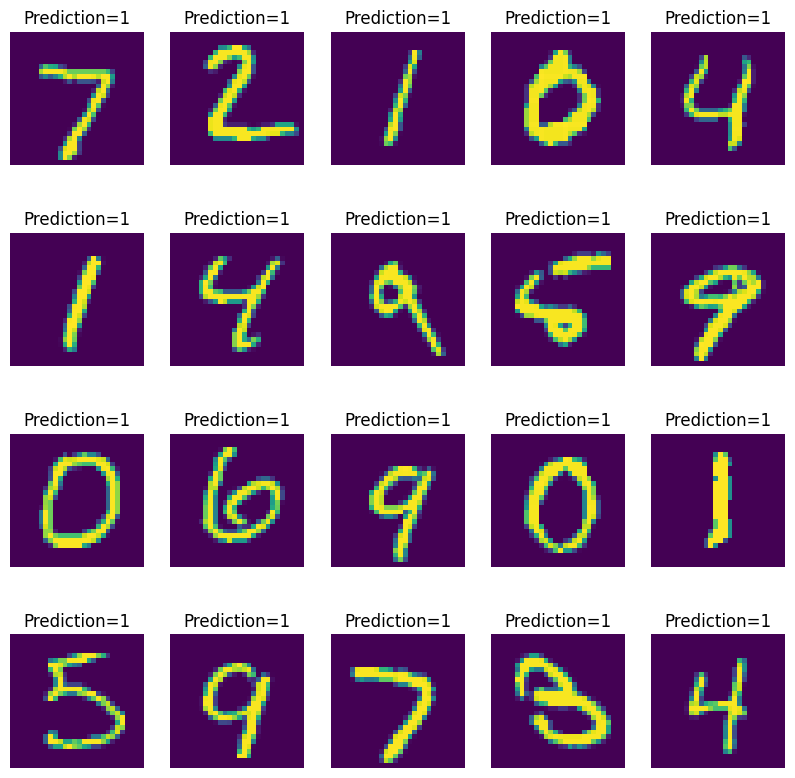

In [20]:
Nplot = 20
plt.figure(figsize=(10,10))
Y = model.predict(X_test, batch_size=64)
#Y=model.predict(X_test)
Y=Y*10.
print(Y.shape)
for n in range(Nplot):
  X=X_test[n,:]
  ax = plt.subplot(4, 5, n+1)
  plt.imshow(X.reshape(28,28))
  plt.axis('off')
  index = np.argmax(Y[n])
  plt.title('Prediction='+str(index))
plt.show()

**Exercises:**

---


**Question 1**: What happens if you increase/decrease the number of hidden layers?


**Question 2:** What happens if you increase/decrease the number of nodes per hidden layer?

**Question 3:** What happens if you increase/decrease the learning rate ?

**Question 4:** What happens if you increase/decrease the number of training epochs  ?

**Question 5:** What happens if you increase/decrease the training batch size ?

**Question 6:** What happens if you use the ReLU activation function in the hidden layers ?

## Question 1 :

# Aumentando número de camadas +3

Aumentando número de camadas: +3

In [3]:
# Trainign batch size
batch_size = 128
# Number of training epochs
epochs = 50
# Fraction of the training data to be used as validation
val_split = 0.3
# Number of classes ( multi-classification )
nb_classes = 10
# Learning rate
lr=0.1


In [4]:
# Load MNIST dataset (28x28 pixel images)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = keras.utils.to_categorical(y_train, nb_classes)
Y_Test = keras.utils.to_categorical(y_test, nb_classes)


11490434/11490434 [==============================] - 1s 0us/step


In [5]:
# Multilayer Perceptron model
model = Sequential()
model.add(Dense(input_dim=784, activation="relu", units=100, kernel_initializer="normal"))
model.add(Dense(activation="relu", units=50, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="relu", units=25, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="relu", units=25, kernel_initializer="normal"))
model.add(Dense(activation="relu", units=25, kernel_initializer="normal"))
model.add(Dense(activation="relu", units=25, kernel_initializer="normal"))
model.add(Dense(activation="sigmoid", units=10, kernel_initializer="normal"))
model.compile(optimizer=SGD(lr=lr), loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 25)                650       
                                                                 
 dense_4 (Dense)             (None, 25)                650       
                                                                 
 dense_5 (Dense)             (None, 25)                650       
                                                                 
 dense_6 (Dense)             (None, 10)                2

In [7]:
# Train
history = model.fit(X_train, Y_Train, validation_split=val_split, epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/50
329/329 [==============================] - 4s 7ms/step - loss: 0.2436 - accuracy: 0.0992 - val_loss: 0.2372 - val_accuracy: 0.0966
Epoch 2/50
329/329 [==============================] - 2s 7ms/step - loss: 0.2313 - accuracy: 0.1002 - val_loss: 0.2255 - val_accuracy: 0.0966
Epoch 3/50
329/329 [==============================] - 2s 6ms/step - loss: 0.2200 - accuracy: 0.1002 - val_loss: 0.2147 - val_accuracy: 0.0966
Epoch 4/50
329/329 [==============================] - 2s 6ms/step - loss: 0.2097 - accuracy: 0.1002 - val_loss: 0.2048 - val_accuracy: 0.0966
Epoch 5/50
329/329 [==============================] - 2s 6ms/step - loss: 0.2002 - accuracy: 0.1002 - val_loss: 0.1957 - val_accuracy: 0.0966
Epoch 6/50
329/329 [==============================] - 3s 8ms/step - loss: 0.1915 - accuracy: 0.1002 - val_loss: 0.1874 - val_accuracy: 0.0966
Epoch 7/50
329/329 [==============================] - 2s 5ms/step - loss: 0.1835 - accuracy: 0.1002 - val_loss: 0.1797 - val_accuracy: 0.0966
Epoch 

In [8]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0905 - accuracy: 0.1135
Summary: Loss over the test dataset: 0.09, Accuracy: 0.11


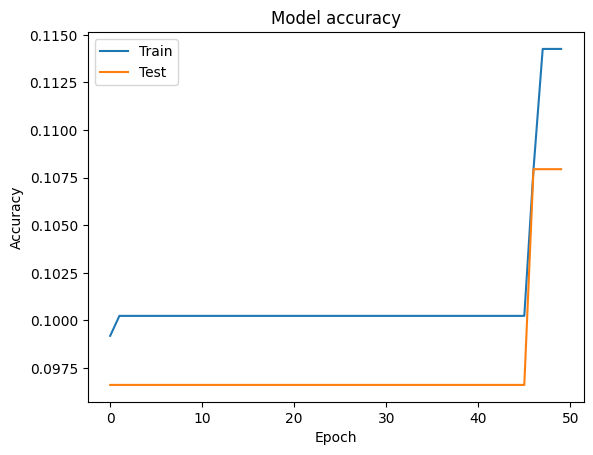

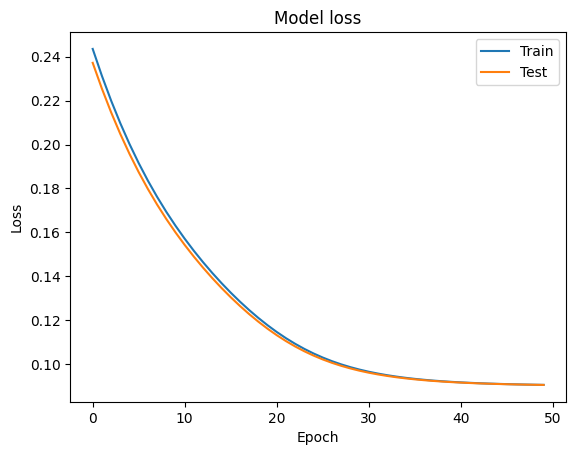

In [9]:
# Training History Visualization

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Decrescendo camadas (em relação ao modelo inicial) -1

**Define the network hyperparameters**

In [26]:
# Trainign batch size
batch_size = 128
# Number of training epochs
epochs = 50
# Fraction of the training data to be used as validation
val_split = 0.3
# Number of classes ( multi-classification )
nb_classes = 10
# Learning rate
lr=0.1


**Load the MNIST dataset and format it for train and validation**

In [27]:
# Load MNIST dataset (28x28 pixel images)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = keras.utils.to_categorical(y_train, nb_classes)
Y_Test = keras.utils.to_categorical(y_test, nb_classes)


**Define the MLP achitecture using KERAS sequential API**

Em relação ao modelo inicial **1** camada foi retirada.

In [28]:
# Multilayer Perceptron model
model = Sequential()
model.add(Dense(input_dim=784, activation="relu", units=100, kernel_initializer="normal"))
model.add(Dense(activation="relu", units=50, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="sigmoid", units=10, kernel_initializer="normal"))
model.compile(optimizer=SGD(lr=lr), loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               78500     
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 10)                510       
                                                                 
Total params: 84060 (328.36 KB)
Trainable params: 84060 (328.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Train the MLP**

In [29]:
# Train
history = model.fit(X_train, Y_Train, validation_split=val_split, epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/50
329/329 [==============================] - 2s 5ms/step - loss: 0.2396 - accuracy: 0.1197 - val_loss: 0.2283 - val_accuracy: 0.1267
Epoch 2/50
329/329 [==============================] - 1s 4ms/step - loss: 0.2113 - accuracy: 0.1361 - val_loss: 0.1890 - val_accuracy: 0.1382
Epoch 3/50
329/329 [==============================] - 1s 4ms/step - loss: 0.1556 - accuracy: 0.1487 - val_loss: 0.1234 - val_accuracy: 0.1547
Epoch 4/50
329/329 [==============================] - 1s 4ms/step - loss: 0.1074 - accuracy: 0.1601 - val_loss: 0.0982 - val_accuracy: 0.1692
Epoch 5/50
329/329 [==============================] - 2s 5ms/step - loss: 0.0954 - accuracy: 0.1754 - val_loss: 0.0935 - val_accuracy: 0.1772
Epoch 6/50
329/329 [==============================] - 2s 6ms/step - loss: 0.0930 - accuracy: 0.1677 - val_loss: 0.0924 - val_accuracy: 0.1568
Epoch 7/50
329/329 [==============================] - 1s 4ms/step - loss: 0.0923 - accuracy: 0.1445 - val_loss: 0.0919 - val_accuracy: 0.1422
Epoch 

**Evaluate the MLP performance**

In [30]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.2085
Summary: Loss over the test dataset: 0.09, Accuracy: 0.21


**Plot the training and validation performances**

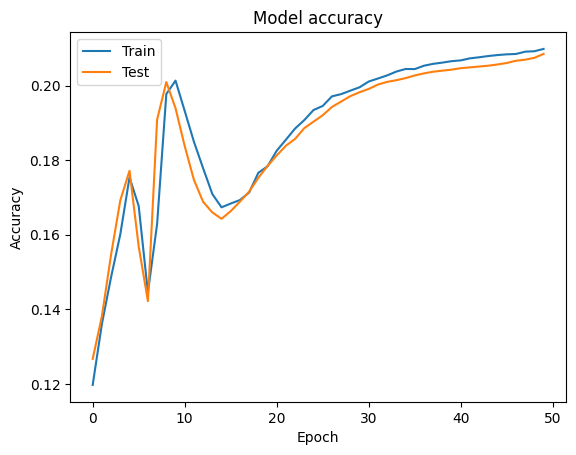

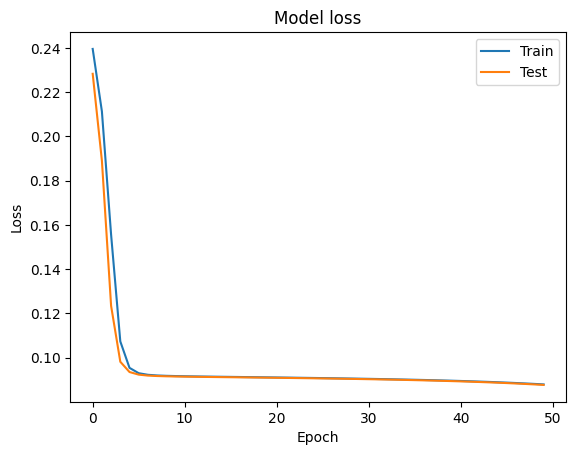

In [31]:
# Training History Visualization

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

No código acima foi preciso substituir "acc" por "accuracy"

157/157 [==============================] - 0s 2ms/step
(10000, 10)


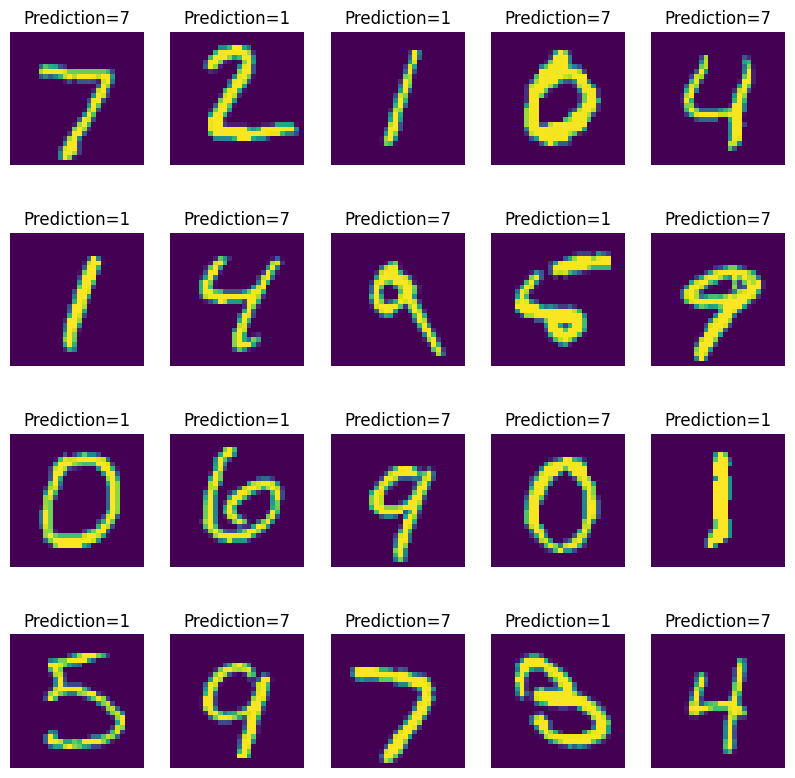

In [32]:
Nplot = 20
plt.figure(figsize=(10,10))
Y = model.predict(X_test, batch_size=64)
#Y=model.predict(X_test)
Y=Y*10.
print(Y.shape)
for n in range(Nplot):
  X=X_test[n,:]
  ax = plt.subplot(4, 5, n+1)
  plt.imshow(X.reshape(28,28))
  plt.axis('off')
  index = np.argmax(Y[n])
  plt.title('Prediction='+str(index))
plt.show()

# Questão 2:

# Diminuindo número de nodes

**Define the network hyperparameters**

In [33]:
# Trainign batch size
batch_size = 128
# Number of training epochs
epochs = 50
# Fraction of the training data to be used as validation
val_split = 0.3
# Number of classes ( multi-classification )
nb_classes = 10
# Learning rate
lr=0.1


**Load the MNIST dataset and format it for train and validation**

In [34]:
# Load MNIST dataset (28x28 pixel images)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = keras.utils.to_categorical(y_train, nb_classes)
Y_Test = keras.utils.to_categorical(y_test, nb_classes)


Link explicando erro com np_utils

https://stackoverflow.com/questions/45149341/importerror-cannot-import-name-np-utils

**Define the MLP achitecture using KERAS sequential API**

Diminuindo número de nodes por um fator 2

In [35]:
# Multilayer Perceptron model
model = Sequential()
model.add(Dense(input_dim=784, activation="relu", units=50, kernel_initializer="normal"))
model.add(Dense(activation="relu", units=25, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="relu", units=12, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="sigmoid", units=10, kernel_initializer="normal"))
model.compile(optimizer=SGD(lr=lr), loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 50)                39250     
                                                                 
 dense_15 (Dense)            (None, 25)                1275      
                                                                 
 dense_16 (Dense)            (None, 12)                312       
                                                                 
 dense_17 (Dense)            (None, 10)                130       
                                                                 
Total params: 40967 (160.03 KB)
Trainable params: 40967 (160.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Train the MLP**

In [36]:
# Train
history = model.fit(X_train, Y_Train, validation_split=val_split, epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/50
329/329 [==============================] - 2s 4ms/step - loss: 0.2437 - accuracy: 0.1065 - val_loss: 0.2374 - val_accuracy: 0.1126
Epoch 2/50
329/329 [==============================] - 1s 4ms/step - loss: 0.2315 - accuracy: 0.1284 - val_loss: 0.2258 - val_accuracy: 0.1305
Epoch 3/50
329/329 [==============================] - 1s 4ms/step - loss: 0.2204 - accuracy: 0.1325 - val_loss: 0.2151 - val_accuracy: 0.1213
Epoch 4/50
329/329 [==============================] - 1s 4ms/step - loss: 0.2102 - accuracy: 0.1218 - val_loss: 0.2053 - val_accuracy: 0.1130
Epoch 5/50
329/329 [==============================] - 1s 4ms/step - loss: 0.2009 - accuracy: 0.1166 - val_loss: 0.1964 - val_accuracy: 0.1096
Epoch 6/50
329/329 [==============================] - 2s 5ms/step - loss: 0.1923 - accuracy: 0.1148 - val_loss: 0.1883 - val_accuracy: 0.1083
Epoch 7/50
329/329 [==============================] - 2s 6ms/step - loss: 0.1846 - accuracy: 0.1143 - val_loss: 0.1809 - val_accuracy: 0.1079
Epoch 

**Evaluate the MLP performance**

In [37]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.0904 - accuracy: 0.1135
Summary: Loss over the test dataset: 0.09, Accuracy: 0.11


**Plot the training and validation performances**

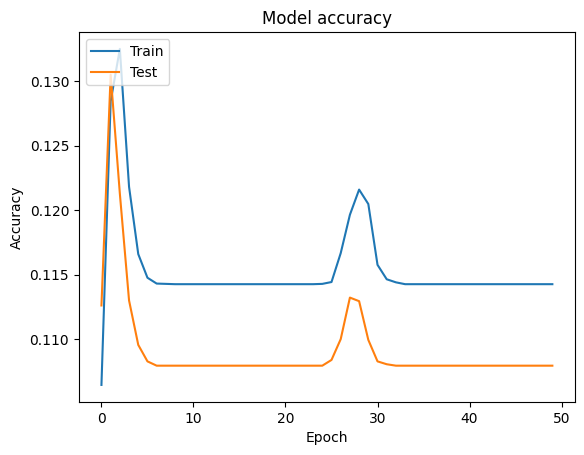

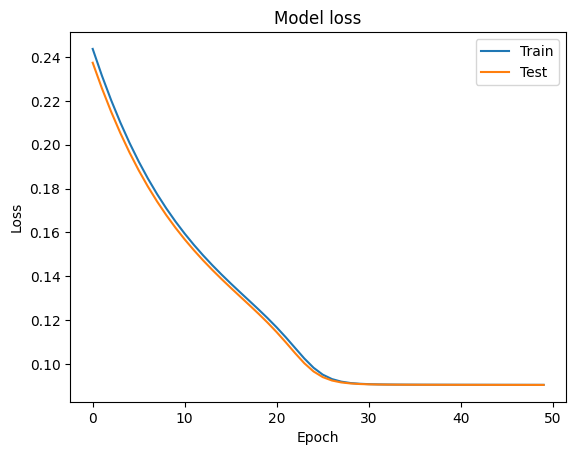

In [38]:
# Training History Visualization

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

No código acima foi preciso substituir "acc" por "accuracy"

157/157 [==============================] - 0s 2ms/step
(10000, 10)


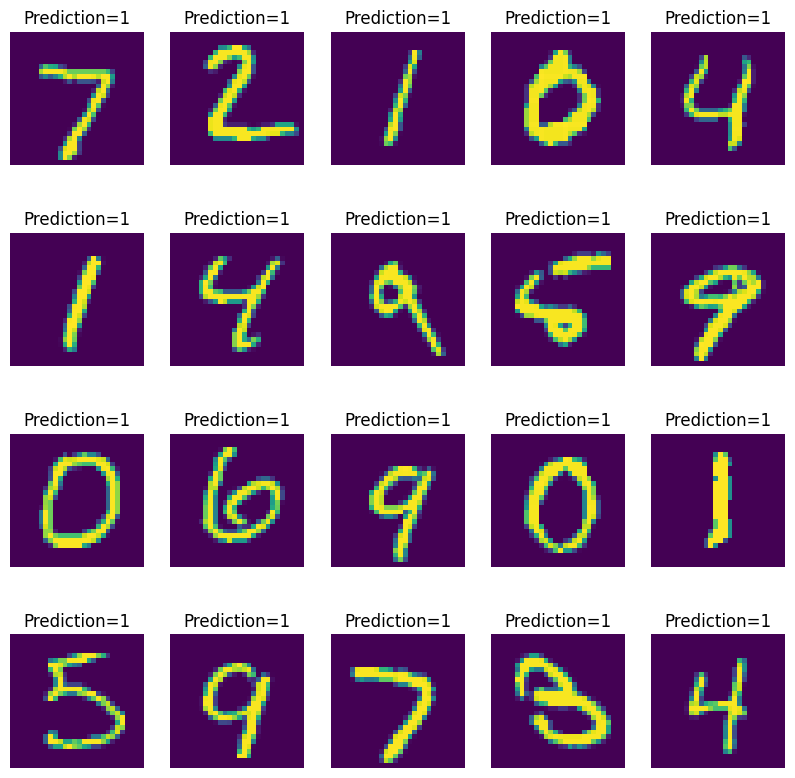

In [39]:
Nplot = 20
plt.figure(figsize=(10,10))
Y = model.predict(X_test, batch_size=64)
#Y=model.predict(X_test)
Y=Y*10.
print(Y.shape)
for n in range(Nplot):
  X=X_test[n,:]
  ax = plt.subplot(4, 5, n+1)
  plt.imshow(X.reshape(28,28))
  plt.axis('off')
  index = np.argmax(Y[n])
  plt.title('Prediction='+str(index))
plt.show()

# Aumento de nodes

Aumentando número de nodes por um fator 2

**Define the network hyperparameters**

In [40]:
# Trainign batch size
batch_size = 128
# Number of training epochs
epochs = 50
# Fraction of the training data to be used as validation
val_split = 0.3
# Number of classes ( multi-classification )
nb_classes = 10
# Learning rate
lr=0.1


**Load the MNIST dataset and format it for train and validation**

In [41]:
# Load MNIST dataset (28x28 pixel images)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = keras.utils.to_categorical(y_train, nb_classes)
Y_Test = keras.utils.to_categorical(y_test, nb_classes)


**Define the MLP achitecture using KERAS sequential API**

Aumentando número de nodes por um fator 2

In [42]:
# Multilayer Perceptron model
model = Sequential()
model.add(Dense(input_dim=784, activation="relu", units=200, kernel_initializer="normal"))
model.add(Dense(activation="relu", units=100, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="relu", units=50, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="sigmoid", units=10, kernel_initializer="normal"))
model.compile(optimizer=SGD(lr=lr), loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 200)               157000    
                                                                 
 dense_19 (Dense)            (None, 100)               20100     
                                                                 
 dense_20 (Dense)            (None, 50)                5050      
                                                                 
 dense_21 (Dense)            (None, 10)                510       
                                                                 
Total params: 182660 (713.52 KB)
Trainable params: 182660 (713.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Train the MLP**

In [43]:
# Train
history = model.fit(X_train, Y_Train, validation_split=val_split, epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/50
329/329 [==============================] - 3s 7ms/step - loss: 0.2398 - accuracy: 0.0918 - val_loss: 0.2307 - val_accuracy: 0.1006
Epoch 2/50
329/329 [==============================] - 2s 6ms/step - loss: 0.2194 - accuracy: 0.0909 - val_loss: 0.2056 - val_accuracy: 0.0933
Epoch 3/50
329/329 [==============================] - 2s 5ms/step - loss: 0.1819 - accuracy: 0.0925 - val_loss: 0.1516 - val_accuracy: 0.0995
Epoch 4/50
329/329 [==============================] - 2s 6ms/step - loss: 0.1216 - accuracy: 0.0961 - val_loss: 0.1018 - val_accuracy: 0.1007
Epoch 5/50
329/329 [==============================] - 3s 9ms/step - loss: 0.0963 - accuracy: 0.0962 - val_loss: 0.0933 - val_accuracy: 0.1004
Epoch 6/50
329/329 [==============================] - 2s 5ms/step - loss: 0.0926 - accuracy: 0.1092 - val_loss: 0.0920 - val_accuracy: 0.1604
Epoch 7/50
329/329 [==============================] - 2s 6ms/step - loss: 0.0919 - accuracy: 0.1489 - val_loss: 0.0917 - val_accuracy: 0.1125
Epoch 

**Evaluate the MLP performance**

In [44]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0904 - accuracy: 0.1152
Summary: Loss over the test dataset: 0.09, Accuracy: 0.12


**Plot the training and validation performances**

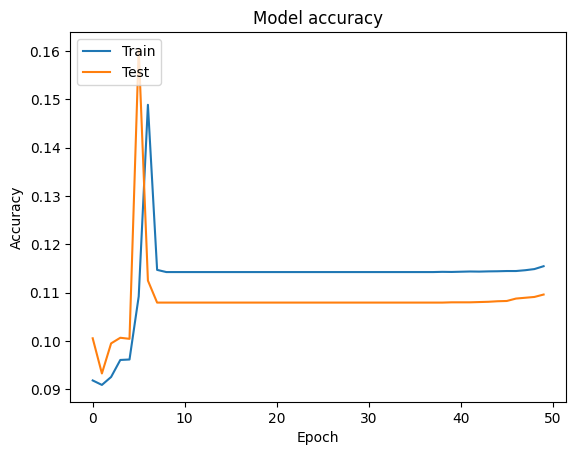

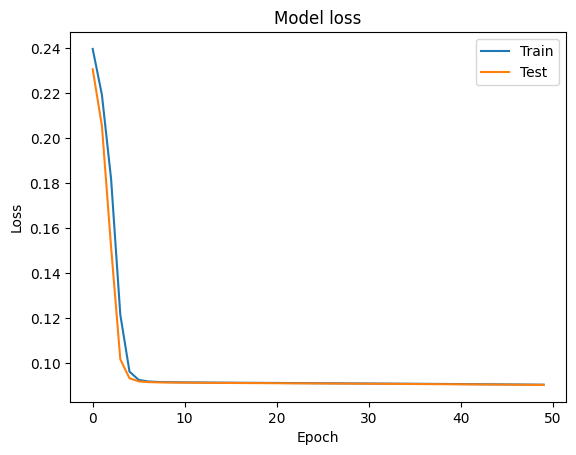

In [45]:
# Training History Visualization

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

No código acima foi preciso substituir "acc" por "accuracy"

157/157 [==============================] - 0s 2ms/step
(10000, 10)


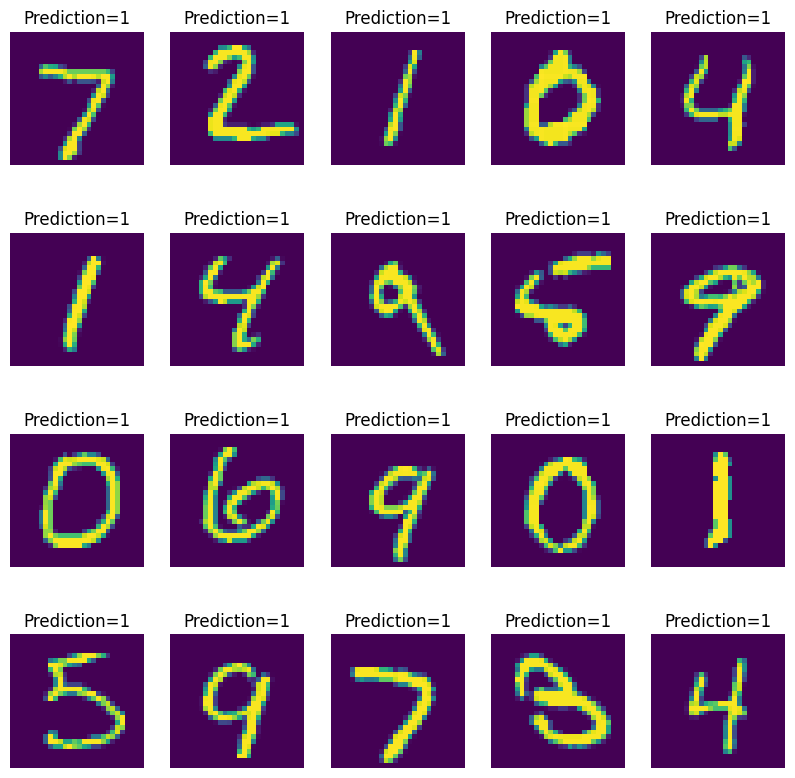

In [46]:
Nplot = 20
plt.figure(figsize=(10,10))
Y = model.predict(X_test, batch_size=64)
#Y=model.predict(X_test)
Y=Y*10.
print(Y.shape)
for n in range(Nplot):
  X=X_test[n,:]
  ax = plt.subplot(4, 5, n+1)
  plt.imshow(X.reshape(28,28))
  plt.axis('off')
  index = np.argmax(Y[n])
  plt.title('Prediction='+str(index))
plt.show()